# Retrieving Collection From MongoDB

#### In this project, I collect data from Metacritic and store it into MongoDB to read and perform an analysis between documentaries and war films. I use an XY Plot to visualize my findings. I will be answering the question: **Are documentaries and war films still in?**

In [2]:
import json
import pymongo
import certifi
import pandas as pd
from matplotlib import pyplot
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import numpy as np

# Retrieving credentials for SQL Server from our credentials file
with open ('/Users/hong.vince/Desktop/DA320/credentials.json') as u:
    data = json.load(u)
    mongo_connection_string = data['my-secret-key']

# Connecting to the database using known good certificates
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())
da320_database = client['DA320']
metacritic_data = da320_database['metacritic']
metacritic = pd.DataFrame(metacritic_data.find())

# Transforming Data Using Pandas

In [3]:
# Converting release dates into actual dates and gathering year/month
metacritic.release_date = pd.to_datetime(metacritic.release_date)
metacritic['year'] = metacritic.release_date.dt.year
metacritic['month'] = metacritic.release_date.dt.month
metacritic.metascore = pd.to_numeric(metacritic.metascore)
metacritic.head()

,_id,title,release_date,description,metascore,image_url,year,month
0,636aa236196da753d75905dc,">Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12
1,636aa236196da753d75905dd,>Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10
2,636aa236196da753d75905de,>Beau Travail,2000-03-31,The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...,2000,3
3,636aa236196da753d75905df,>Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...,2000,9
4,636aa236196da753d75905e0,>Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6


# XY Plot Comparing Documentaries to War Films 
#### I compare two types of movies using **keywords**, and then plot them into a graph to visualize the trajectory of their releases from the years 2000 - 2022.

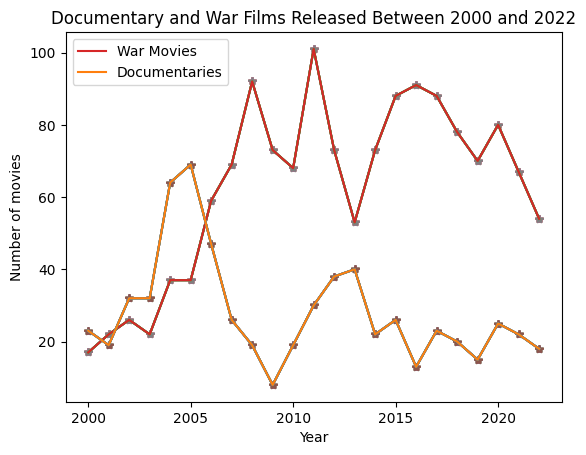

In [4]:
scores_war = metacritic[metacritic['description'].str.contains("war")].groupby(metacritic.year).agg('count')
scores_documentary = metacritic[metacritic['description'].str.contains("documentary")].groupby(metacritic.year).agg('count')


# Axis labels
pyplot.title('Documentary and War Films Released Between 2000 and 2022')
pyplot.xlabel('Year')
pyplot.ylabel('Number of movies')

# Counting documentary and war films measured by metacritic by year, and plotting the results
pyplot.plot(scores_war, '*')
pyplot.plot(scores_documentary, '*')
pyplot.plot(scores_war, label='War Movies')
pyplot.plot(scores_documentary, label='Documentaries')
pyplot.legend(loc='upper right')

# Code to reduce repeating lables in the legend
# Source: https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend 
handles, labels = pyplot.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
pyplot.legend(by_label.values(), by_label.keys())

pyplot.show()

# Conclusion
#### The release of documentaries and war films seem to hit their peaks in the year 2005 and 2011, respectively. Through the years, both types of films have been on a decline. Releases for both documentaries and war films plummet just after their peak year, with the proceeding years being rather bumpy. Although production for both types of films witness somewhat of a resurgence between the years 2013 and 2020, they have been steadily declining. In conclusion, the decline of these two genres may be a result of oversaturation, and being overshadowed by the current Hollywood zeitgeist of superhero films. 